In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 9400823.927974287
R^2 Score: -0.16982061352786282


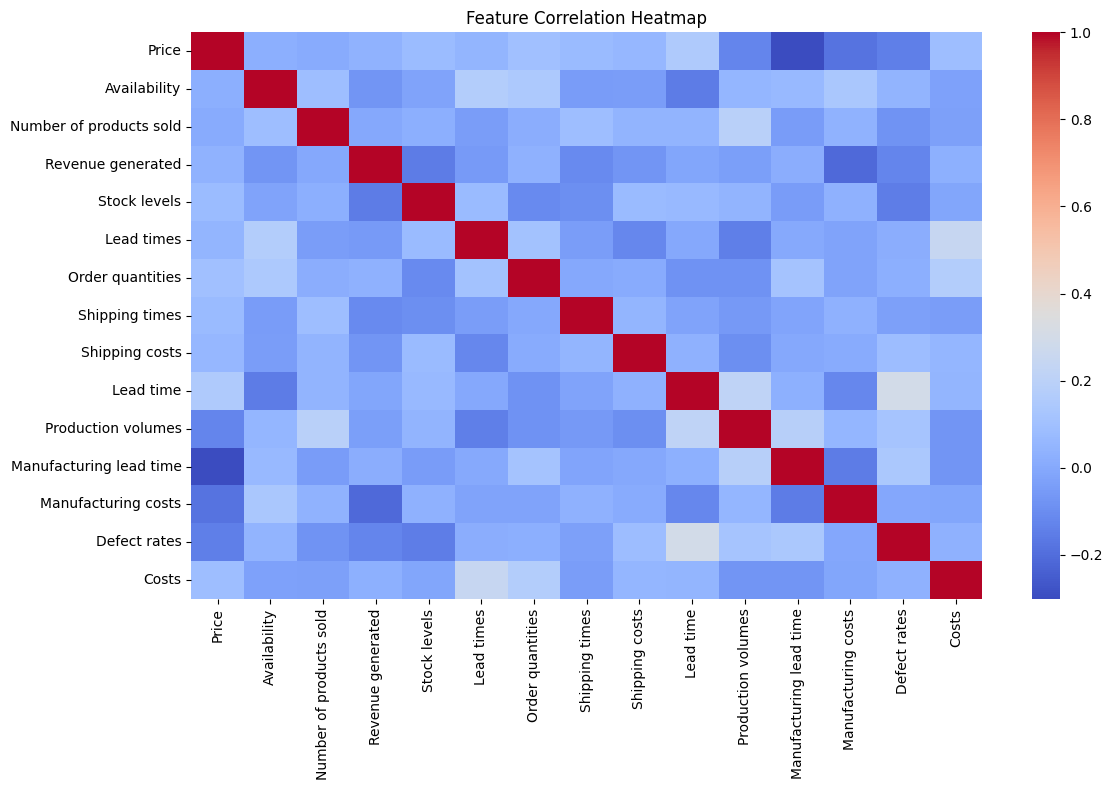

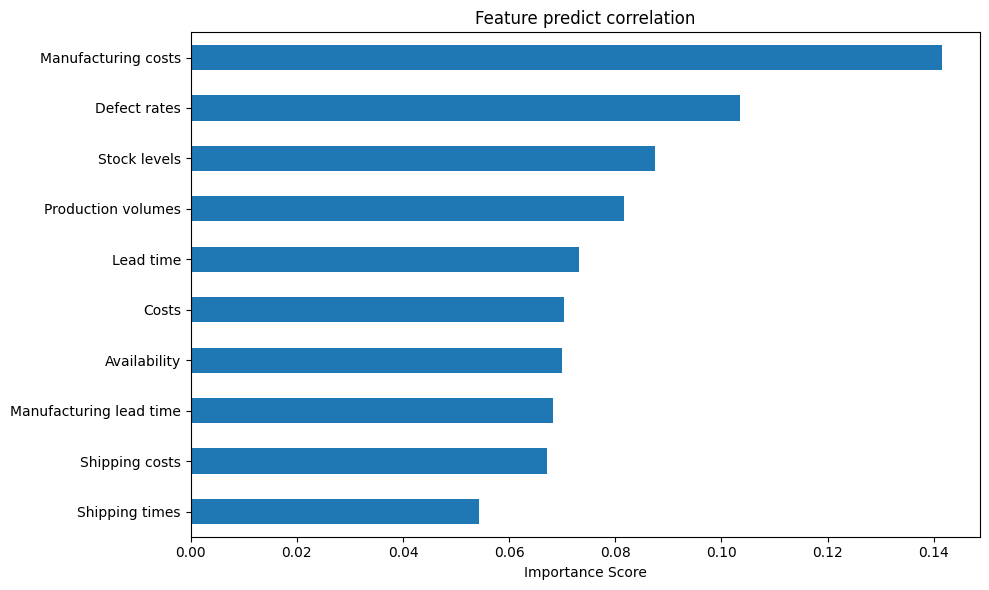

In [4]:
df = pd.read_csv("Blumetra Assignment_Supply_Chain_Data.csv")
drop_cols = ['SKU', 'Supplier name', 'Product type', 'Customer demographics',
             'Shipping carriers', 'Location', 'Inspection results',
             'Transportation modes', 'Routes']
df_clean = df.drop(columns=drop_cols)
df_encoded = pd.get_dummies(df_clean)

df_encoded = df_encoded.dropna()
target = 'Revenue generated'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh')
plt.title("Feature predict correlation")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




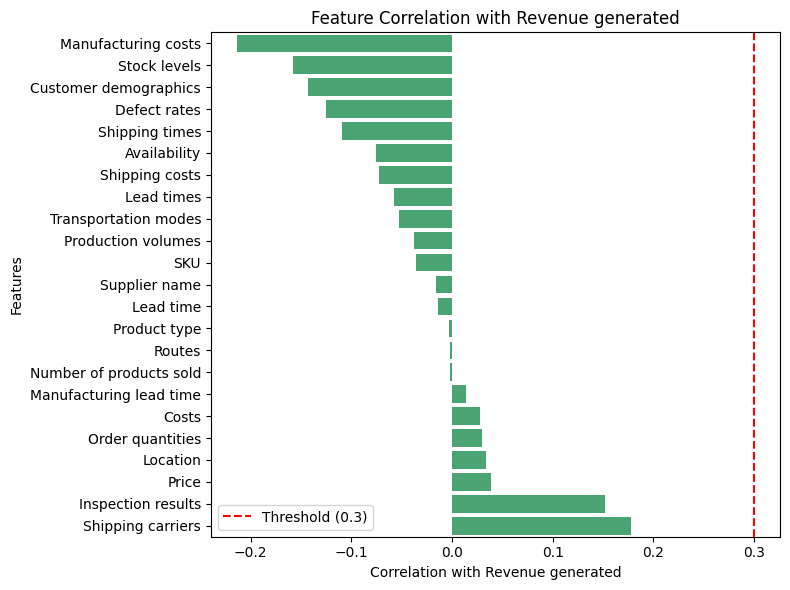

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Blumetra Assignment_Supply_Chain_Data.csv")

# Encode categorical features as numeric (for correlation calculation)
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Calculate correlation with the target
target = 'Revenue generated'
correlation = df_encoded.corr()[target].drop(target).sort_values()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.values, y=correlation.index, color='mediumseagreen')

# Threshold line
plt.axvline(0.3, color='red', linestyle='--', label='Threshold (0.3)')
plt.xlabel("Correlation with Revenue generated")
plt.ylabel("Features")
plt.title("Feature Correlation with Revenue generated")
plt.legend()
plt.tight_layout()
plt.show()
